# Actinobacillus succinogenes VS Basfia succiniciproducens

Actinobacillus succinogenes (AS) and Basfia succiniciproducens (BS) are both succinic acid producers found in the rumens of cattle.

A research article with the title: "Valorization of spent sulphite liquor for succinic acid production via continuous fermentation system" by Ladakis et. al. (2018) was studied and its data analyzed. It compared metabolic yields, productivities and titres (YPTs) of AS and BS metabolites on both xylose and spent sulphite liquor (SSL) as substrate.

These two organisms were independantly evaluated metabolically and on their industrial applicability. Xylose was used as model substrate. Metabolic flux analysis and mass balance (black box) analysis was employed. The article data was used primarily as product rate specifications. An energy balance was done following the flux model and not included as an equation for solving the system.

The metabolic evaluation focused mainly on the use of the PPP and differences in TCA cycle uilization of each organism.

## _AS_
The Metabolic map of AS is provided below:

![AS metabolism](Figures/AS met.png)

It is evident that AS posesses a broken TCA cycle with the production of succinic acid only possible via the reductive route. Fumerate respiration also occurs.

As xylose is used as substrate, the Pentose Phosphate Pathway (PPP) plays an active role.

All of the fluxes are solvable utilizing product concentrations provided in the article.

## _BS_
The Metabolic map of BS is provided below:

![AS metabolism](Figures/BS met.png)

BS posesses a complete TCA cycle and utilizes fumerate respiration.

The TCA cycle doesn't function in a cyclical fashion, but rather utilizes the seperate reductive and oxidative routes to produce succinic acid respectively. It is hypothesized that succinic acid is mainly produced via the reductive route, but also by the oxidative route at loww rates.

BS utilizes the PPP due to the xylose substrate.

BS also posesses several pyruvate metabolism fluxes that are to be analyzed.

# Model

The necessary modules are imported.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
import pandas as pd
%matplotlib notebook

Some arbitrary physiological parameters are estimated and assumed equal for both AS and BS.

In [2]:
alpha = 0.12
gamma = 1.8
mumax = 0.15
thetamax = 0.1
Km = 0.001
MMX = 1*12 + 1.9*1 + 0.45*16 + 0.23*14

In [3]:
def beta(beta):
    nul1 = (1 + alpha)*4 - ((4 + 1*1.9 - 2*0.45 - 3*0.23) + 2*beta)
    return nul1
beta = fsolve(beta, alpha)[0]

Data is extracted from the article graphs and divided into AS and BS data categories respectively.

It is understood that the biomass concentration was calculated by finding the difference between total carbon sources and total known carbon sinks. For this reason, biomass concentration was not calculated independantly (but could be done using volumetric succinic acid production and succinic acid concentration simultaneous equations) but rather used as provided in the article.

In [4]:
cSf = 40/30 # g/l feed substrate concentration

D_AS = np.array(pd.read_csv('Data/2_1_cSA_AS.csv', header = None))[:,0]
cSA_AS = np.array(pd.read_csv('Data/2_1_cSA_AS.csv', header = None))[:,1]/29.5
cS_AS = np.array(pd.read_csv('Data/2_2_cS_AS.csv', header = None))[:,1]/30
cAA_AS = np.array(pd.read_csv('Data/3_1_cAA_AS.csv', header = None))[:,1]/30
cFA_AS = np.array(pd.read_csv('Data/3_1_cFA_AS.csv', header = None))[:,1]/46
rVSA_AS = np.array(pd.read_csv('Data/2_3_P_AS.csv', header = None))[:,1]/29.5
YSSA_AS = np.array(pd.read_csv('Data/2_4_Y_AS.csv', header = None))[:,1]/29.5*30
YAASA_AS = np.array(pd.read_csv('Data/3_2_SAAA_AS.csv', header = None))[:,1]/29.5*30
YAAFA_AS = np.array(pd.read_csv('Data/3_2_FAAA_AS.csv', header = None))[:,1]/46*30
cX_AS = np.array(pd.read_csv('Data/6_1_cX_AS.csv', header = None))[:,1]/MMX

D_BS = np.array(pd.read_csv('Data/2_1_cSA_BS.csv', header = None))[:,0]              # Dilution rate
cSA_BS = np.array(pd.read_csv('Data/2_1_cSA_BS.csv', header = None))[:,1]/29.5       # Succinic acid concentration
cS_BS = np.array(pd.read_csv('Data/2_2_cS_BS.csv', header = None))[:,1]/30           # Substrate concentration
cAA_BS = np.array(pd.read_csv('Data/3_1_cAA_BS.csv', header = None))[:,1]/30         # Acetic acid concentration
cFA_BS = np.array(pd.read_csv('Data/3_1_cFA_BS.csv', header = None))[:,1]/46         # Formic acid concentration
cLA_BS = np.array(pd.read_csv('Data/3_1_cLA_BS.csv', header = None))[:,1]/30         # Lactic acid concentration
rVSA_BS = np.array(pd.read_csv('Data/2_3_P_BS.csv', header = None))[:,1]/29.5        # Succinic acid productivity
YSSA_BS = np.array(pd.read_csv('Data/2_4_Y_BS.csv', header = None))[:,1]/29.5*30     # Succinic acid concentration on substrate concentration
YAASA_BS = np.array(pd.read_csv('Data/3_2_SAAA_BS.csv', header = None))[:,1]/29.5*30 # Succinic acid concentration on acetic acid concentration
YAAFA_BS = np.array(pd.read_csv('Data/3_2_FAAA_BS.csv', header = None))[:,1]/46*30   # Formic acid concentration on acetic acid concentration
YAALA_BS = np.array(pd.read_csv('Data/3_2_LAAA_BS.csv', header = None))[:,1]/30*30   # Lactic acid concentration on acetic acid concentration
cX_BS = np.array(pd.read_csv('Data/6_1_cX_BS.csv', header = None))[:,1]/MMX          # Biomass concentration

## _AS flux_

In [5]:
S_base_AS = np.matrix([[-1, 1 + alpha, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                        # 0
                       [0, 0, -1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],                                # 1
                       [0, 0, 0, -1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],                                # 2
                       [0, 0, 0, 0, 0, 0, 5/6, -1, 0, 0, 0, 0, 0, 0],                              # 3
                       [0, 0, 0, 0, -1, 1, 0, 0, -1, 0, 0, 0, 0, 0],                               # 4
                       [0, 0, 0, 1, 0, 0, 0, 0, -4, 0, 0, 0, 0, 0],                                # 5
                       [0, 0, 0, 0, 0, -1, 0, 0, 0, 3/4, 1, 0, 0, 0],                              # 6
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 3/2, 3/2, 0],                            # 7
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 1],                               # 8
                       [0, beta, 0, 0, 0, 1/3, 1/3, 0, 0, -1/2, 0, 0, 1/2, 0]])                    # 9
#                        [-1/5, -gamma, 0, 0, -1/6, 1/3, 0, 0, 0, 1/4 + 1/6, 1/3, 0, 0, 1/2]])       # 10

## _AS mass balance_

In [6]:
Smb_base_AS = np.matrix([[1, 0, 1, 1, 1, 1, 1, 0],
                         [2, 3, 1.9, 3/2, 2, 2, 0, 2],
                         [1, 0, 0.45, 1, 2, 1, 2, 1],
                         [0, 1, 0.23, 0, 0, 0, 0, 0]])

## _AS rate and energy calculations_

In [7]:
cXlys_AS = []
rSAlys_AS = []
rFAlys_AS = []
rAAlys_AS = []
rSlys_AS = []
rlys_AS = []
rmblys_AS = []

print("Comparison between calculated biomass based succinic acid production rate from succinic acid concentration and biomass based succinic acid production from volumetric production conversion.")
print("________________________")

for i in range(0, len(D_AS)):
    
    rSA1_AS = rVSA_AS[i]/cX_AS[i]
    print(rSA1_AS)
    rSA_AS = D_AS[i]*cSA_AS[i]/cX_AS[i]
    print(rSA_AS)
    print(rSA1_AS/rSA_AS)
    print('Does match')
    print("________________________")
    rFA_AS = D_AS[i]*cFA_AS[i]/cX_AS[i]
    rAA_AS = D_AS[i]*cAA_AS[i]/cX_AS[i]
    rS_AS = -D_AS[i]*(cSf - cS_AS[i])/cX_AS[i]
    
    mu_AS = D_AS[i] #mumax*cS/(Km + cS)
    theta_AS =  0 #thetamax*cS/(Km + cS)

    mu_spec_AS = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    SA_spec_AS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    FA_spec_AS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/2, 0, 0]
    AA_spec_AS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    S_spec_AS = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    S_AS = np.vstack([S_base_AS, mu_spec_AS, AA_spec_AS, FA_spec_AS, SA_spec_AS])
    C_AS = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, mu_AS, rAA_AS, rFA_AS, rSA_AS])
    r_AS = np.linalg.solve(S_AS, C_AS)
    
    rSAlys_AS.append(rSA_AS)
    rFAlys_AS.append(rFA_AS)
    rAAlys_AS.append(rAA_AS)
    rSlys_AS.append(rS_AS)
    rlys_AS.append(r_AS)
    
    #######################################################
    
    mumb_spec_AS = [0, 0, 1, 0, 0, 0, 0, 0]    # mb postscript denotes mass balance
    SAmb_spec_AS = [0, 0, 0, 1, 0, 0, 0, 0]
    FAmb_spec_AS = [0, 0, 0, 0, 1, 0, 0, 0]
    AAmb_spec_AS = [0, 0, 0, 0, 0, 1, 0, 0]
    Smb_spec_AS = [1, 0, 0, 0, 0, 0, 0, 0]
    Smb_AS = np.vstack([Smb_base_AS, SAmb_spec_AS, FAmb_spec_AS, AAmb_spec_AS, mumb_spec_AS])
    Cmb_AS = np.array([0, 0, 0, 0, rSA_AS, rFA_AS, rAA_AS, mu_AS])
    rmb_AS = np.linalg.solve(Smb_AS, Cmb_AS)
    
    rmblys_AS.append(rmb_AS)  
    
rSA_AS = np.array(rSAlys_AS)
rFA_AS = np.array(rFAlys_AS)
rAA_AS = np.array(rAAlys_AS)
rS_AS = np.array(rSlys_AS)
r_AS = np.array(rlys_AS)

r0_AS = r_AS[:,0]   # Fluxes according to metabolic map
r1_AS = r_AS[:,1]
r2_AS = r_AS[:,2]
r3_AS = r_AS[:,3]
r4_AS = r_AS[:,4]
r5_AS = r_AS[:,5]
r6_AS = r_AS[:,6]
r7_AS = r_AS[:,7]
r8_AS = r_AS[:,8]
r9_AS = r_AS[:,9]
r10_AS = r_AS[:,10]
r11_AS = r_AS[:,11]
r12_AS = r_AS[:,12]
r13_AS = r_AS[:,13]

rC_AS = alpha*r1_AS + 1/6*r6_AS - 1/4*r9_AS + 1/2*r12_AS # CO2 consumption
rATP_AS = -1/5*r0_AS - 1/6*r4_AS + 1/3*r5_AS + (1/4 + 1/6)*r9_AS + 1/3*r10_AS + 1/2*r13_AS # ATP generation

#######################################################

rmb_AS = np.array(rmblys_AS)

rSmb_AS = rmb_AS[:,0]  # Rate of substrate consumption
rNmb_AS = rmb_AS[:,1]  # Rate of nitrogen consumption
rXmb_AS = rmb_AS[:,2]  # Rate of biomass production
rSAmb_AS = rmb_AS[:,3] # Rate of succinic acid production
rFAmb_AS = rmb_AS[:,4] # Rate of formic acid production
rAAmb_AS = rmb_AS[:,5] # Rate of acetic acid production
rCmb_AS = rmb_AS[:,6]  # Rate of carbon dioxide production
rHmb_AS = rmb_AS[:,7]  # Rate of water production

Comparison between calculated biomass based succinic acid production rate from succinic acid concentration and biomass based succinic acid production from volumetric production conversion.
________________________
0.0498998247535
0.0444892328882
1.1216157599
Does match
________________________
0.0548549995898
0.0595857058883
0.920606692025
Does match
________________________
0.07320669875
0.0779143387559
0.939579285649
Does match
________________________
0.110211664985
0.110384206816
0.998436897484
Does match
________________________
0.183769224608
0.180533579314
1.01792267846
Does match
________________________
0.476680879768
0.471874825041
1.01018502042
Does match
________________________
0.910299338847
0.906744220162
1.00392075142
Does match
________________________
1.38897610839
1.38872701214
1.00017937021
Does match
________________________


## _AS discussion_

Flux model specs used: biomass ($\mu$), succinic acid (SA), formic acid (FA), acetic acid (AA).

Mass balance specs used: $\mu$, SA, FA, AA.

The substrate specification was not used to solve for the system, but rather used as a check. This is illustrated later.

The CO$_2$ rate calculated by the flux model also exactly matches the CO$_2$ rate calculated by the mass balance as all CO$_2$ producing/consuming streams were fully specified.

Overall, AS has a simple metabolic map to analyze and scrutinize. Although, this means that not much modification or adaptibility is necessarily possible.

In [8]:
##############################################################################################################################

## _BS flux_

An encomposing flux model was set up for BS. Insufficient fluxes were specified to model the metabolism in its entirety. This was overcome by specifying fluxes: r$_{13}$, r$_{16}$, r$_{19}$, r$_{20}$ and r$_{21}$ as zero.

Furthermore, two seperate sets of flux equations are specified. The first describes the TCA cycle functioning normally in the traditional rotational dirction (full cycle). The second describes the TCA cycle as using the reductive and oxidative branches seperately to produce SA.

The first set of equations is used for analysis and confirms the that the TCA cycle functions in its two seperate branches in any case.

An additional specification is important to note. Flux r$_{17}$ is also specified to be zero as, when otherwise calculated, results in having a very small but negative value. This is not practically possible (although mathematically permitted), but illustrates that the oxidative TCA branch is not utilized at all.

In [9]:
# Cyclical TCA

S_base_BS = np.matrix([[-1, 1 + alpha, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, -1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, -1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 5/6, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, -1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3/4, 3/4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 3/2, 0, 0, 3/2, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1/2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 6/5, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 5/4, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4/3, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, -4/3, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0],
                       [0, beta, 0, 0, 0, 1/3, 1/3, 0, 0, 0, -1/3, 0, 0, 1, 1/2, 0, 0, 0, 0, 0, 1/3, 0, 0, 0, 1/5, 1/4, 0, 0, 0, 1/4, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]]) # To remove the r17 = 0 spec, uncomment this line and comment the one above.

In [10]:
# Branched TCA

# S_base_BS = np.matrix([[-1, 1 + alpha, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, -1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, -1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 5/6, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, -1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3/4, 3/4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 3/2, 0, 0, 3/2, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1/2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 6/5, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 5/4, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, -1],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4/3, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, -4/3, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0],
#                        [0, beta, 0, 0, 0, 1/3, 1/3, 0, 0, 0, -1/3, 0, 0, 1, 1/2, 0, 0, 0, 0, 0, 1/3, 0, 0, 0, 1/5, 1/4, 0, 0, 0, 1/4, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
##                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
#                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]])

## _BS mass balance_

In [11]:
Smb_base_BS = np.matrix([[1, 0, 1, 1, 1, 1, 1, 1, 0],
                         [2, 3, 1.9, 3/2, 2, 2, 2, 0, 2],
                         [1, 0, 0.45, 1, 2, 1, 1, 2, 1],
                         [0, 1, 0.23, 0, 0, 0, 0, 0, 0]])

## _BS rate and energy calculations_

In [12]:
cXlys_BS = []
rSAlys_BS = []
rFAlys_BS = []
rLAlys_BS = []
rAAlys_BS = []
rSlys_BS = []
rlys_BS = []
rmblys_BS = []

print("Comparison between calculated biomass based succinic acid production rate from succinic acid concentration and biomass based succinic acid production from volumetric production conversion.")
print("________________________")

rCO2_BSlys = np.array([0.01313316, 0.03048084, 0.09994077, 0.13269711, 0.25241733])

for i in range(0, len(D_BS)):
    
    rSA1_BS = rVSA_BS[i]/cX_BS[i]
    print(rSA1_BS)
    rSA_BS = D_BS[i]*cSA_BS[i]/cX_BS[i]
    print(rSA_BS)
    print(rSA1_BS/rSA_BS)
    print('Does match')
    print("________________________")
    rFA_BS = D_BS[i]*cFA_BS[i]/cX_BS[i]
    rLA_BS = D_BS[i]*cLA_BS[i]/cX_BS[i]
    rAA_BS = D_BS[i]*cAA_BS[i]/cX_BS[i]
    rS_BS = -D_BS[i]*(cSf - cS_BS[i])/cX_BS[i]
    
    rCO2_BS = rCO2_BSlys[i]
    
    mu_BS = D_BS[i] #mumax*cS/(Km + cS)
    theta_BS =  0 #thetamax*cS/(Km + cS)

    mu_spec_BS = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    SA_spec_BS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    FA_spec_BS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    LA_spec_BS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    AA_spec_BS = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    S_spec_BS = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    CO2_spec_BS = [0, alpha, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 1, 1/2, 0, 0, 0, -1/4, -1/4, 1/3, 1/3, 0, 0, 1/5, 1/4, 0, 0, 0, 0, 0, 0]
    S_BS = np.vstack([S_base_BS, FA_spec_BS, AA_spec_BS, S_spec_BS, LA_spec_BS, mu_spec_BS, SA_spec_BS]) #, CO2_spec_BS])
#     print(np.shape(S_BS))
#     print(np.linalg.matrix_rank(S_BS))
    C_BS = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, rFA_BS, rAA_BS, rS_BS, rLA_BS, mu_BS, rSA_BS]) #, rCO2_BS])
#     print(np.shape(C_BS))
    r_BS = np.linalg.solve(S_BS, C_BS)
    
    rSAlys_BS.append(rSA_BS)
    rFAlys_BS.append(rFA_BS)
    rLAlys_BS.append(rLA_BS)
    rAAlys_BS.append(rAA_BS)
    rSlys_BS.append(rS_BS)
    rlys_BS.append(r_BS)
    
    #######################################################
    
    mumb_spec_BS = [0, 0, 1, 0, 0, 0, 0, 0, 0]
    SAmb_spec_BS = [0, 0, 0, 1, 0, 0, 0, 0, 0]
    FAmb_spec_BS = [0, 0, 0, 0, 1, 0, 0, 0, 0]
    LAmb_spec_BS = [0, 0, 0, 0, 0, 1, 0, 0, 0]
    AAmb_spec_BS = [0, 0, 0, 0, 0, 0, 1, 0, 0]
    Smb_spec_BS = [1, 0, 0, 0, 0, 0, 0, 0, 0]
    Smb_BS = np.vstack([Smb_base_BS, SAmb_spec_BS, FAmb_spec_BS, AAmb_spec_BS, LAmb_spec_BS, mumb_spec_BS])
    Cmb_BS = np.array([0, 0, 0, 0, rSA_BS, rFA_BS, rAA_BS, rLA_BS, mu_BS])
    rmb_BS = np.linalg.solve(Smb_BS, Cmb_BS)
    
    rmblys_BS.append(rmb_BS)  
    
rSA_BS = np.array(rSAlys_BS)
rFA_BS = np.array(rFAlys_BS)
rLA_BS = np.array(rLAlys_BS)
rAA_BS = np.array(rAAlys_BS)
rS_BS = np.array(rSlys_BS)
r_BS = np.array(rlys_BS)

r0_BS = r_BS[:,0]   # Fluxes according to metabolic map
r1_BS = r_BS[:,1]
r2_BS = r_BS[:,2]
r3_BS = r_BS[:,3]
r4_BS = r_BS[:,4]
r5_BS = r_BS[:,5]
r6_BS = r_BS[:,6]
r7_BS = r_BS[:,7]
r8_BS = r_BS[:,8]
r9_BS = r_BS[:,9]
r10_BS = r_BS[:,10]
r11_BS = r_BS[:,11]
r12_BS = r_BS[:,12]
r13_BS = r_BS[:,13]
r14_BS = r_BS[:,14]
r15_BS = r_BS[:,15]
r16_BS = r_BS[:,16]
r17_BS = r_BS[:,17]
r18_BS = r_BS[:,18]
r19_BS = r_BS[:,19]
r20_BS = r_BS[:,20]
r21_BS = r_BS[:,21]
r22_BS = r_BS[:,22]
r23_BS = r_BS[:,23]
r24_BS = r_BS[:,24]
r25_BS = r_BS[:,25]
r26_BS = r_BS[:,26]
r27_BS = r_BS[:,27]
r28_BS = r_BS[:,28]
r29_BS = r_BS[:,29]
r30_BS = r_BS[:,30]
r31_BS = r_BS[:,31]

# print(r18_BS/r21_BS)

rC_BS = alpha*r1_BS + 1/6*r6_BS - 1/4*r18_BS - 1/4*r19_BS + r13_BS + 1/2*r14_BS + 1/3*r20_BS + 1/3*r21_BS + 1/5*r24_BS + 1/4*r25_BS # CO2 consumption
rATP_BS = -1/5*r0_BS - 1/6*r4_BS + 1/3*r5_BS + 1/3*r9_BS + 1/2*r15_BS + 1/4*r18_BS + 1/4*r26_BS - 1/6*r27_BS # ATP generation

#######################################################

rmb_BS = np.array(rmblys_BS)

rSmb_BS = rmb_BS[:,0]
rNmb_BS = rmb_BS[:,1]
rXmb_BS = rmb_BS[:,2]
rSAmb_BS = rmb_BS[:,3]
rFAmb_BS = rmb_BS[:,4]
rLAmb_BS = rmb_BS[:,5]
rAAmb_BS = rmb_BS[:,6]
rCmb_BS = rmb_BS[:,7]
rHmb_BS = rmb_BS[:,8]

Comparison between calculated biomass based succinic acid production rate from succinic acid concentration and biomass based succinic acid production from volumetric production conversion.
________________________
0.0748672458407
0.0843684461019
0.887384434583
Does match
________________________
0.172068474556
0.192439943069
0.894141163272
Does match
________________________
0.57994501789
0.580611502176
0.998852099409
Does match
________________________
0.717606157589
0.756006426533
0.949206425241
Does match
________________________
1.31370803516
1.36046924986
0.965628613287
Does match
________________________


## _BS discussion_

Flux model specs used: biomass ($\mu$), succinic acid (SA), formic acid (FA), lactic acid (LA), acetic acid (AA), substrate (S).

Mass balance specs used: $\mu$, SA, FA, LA, AA.

The substrate specification was not used to solve for the mass balance, but rather used as a check. This is illustrated later. It is, however, used to solve for the flux model as not enough other specifications are available.

Flux r$_{16}$ was specified as zero.

The CO$_2$ rate calculated by the flux model does not exactly match the CO$_2$ rate calculated by the mass balance as there are a number of streams producing/consuming CO$_2$ that were specified as zero as not enough specifications were available to fully solve the system. Additional streams concerning CO$_2$ that were neglected are r$_{13}$, r$_{19}$, r$_{20}$ and r$_{21}$. These streams were individually left unspecified (by rather specifying r$_{17}$ as zero) to test if this would have an influence on the CO$_2$ rate.

By unspecifying r$_{20}$, both r$_{18}$ and r$_{20}$ have realistic values, but in the opposite direction that is expected. It is expected that this occurs due to r$_{20}$ then consuming more NADH and CO$_2$ if utilized in the opposite direction.

By unspecifying r$_{21}$, both r$_{18}$ and r$_{21}$ have unrealistically high values, but in the expected direction. Both have values above 1 $\times \ 10^{15}$ and are relatd by r$_{18}$/r$_{21}$ $ = \ 1.333$. This is because there is only a carbon constraint keeping these streams in check (no NADH from either), therfore they could have any numerical value as long as the relationship between the two is correct.

By unspecifying r$_{19}$, the result was a singular matrix. Fluxes r$_{18}$ and r$_{19}$ are treated as the same stream in the model (as ATP is calculated afterwards and not used to solve the system) and, therefore, two identical equations exist to solve for two unidentical unknowns.

By unspecifying either r$_{13}$ or r$_{16}$, this also resulted in a singular matrix.

It was attempted to add a CO$_2$ specification to the flux model from the mass balance. This was also unsuccessful due to the reasons described above.

It is recommended to simplify the model to the greatest achievable extent by measuring enzyme activity levels.

In [13]:
##############################################################################################################################

# Initial comparisons

Initial comparisons include:
* Both organisms create mainly succinic acid.
* BS produces one more product than AS.
* Both organisms create a biofilm.
* Side products created might be useful or valuable as they are also organic acids.

## _Flux model accuracy_

To confirm that we have good mass balance closure, the flux model values were compared to overall mass balance values. As most other specifications were used to solve for the flux model, the substrate consumption was used to compare flux model to mass balance values. Comparison values as well as error percentages are determined and plotted below for both AS and BS.

<IPython.core.display.Javascript object>


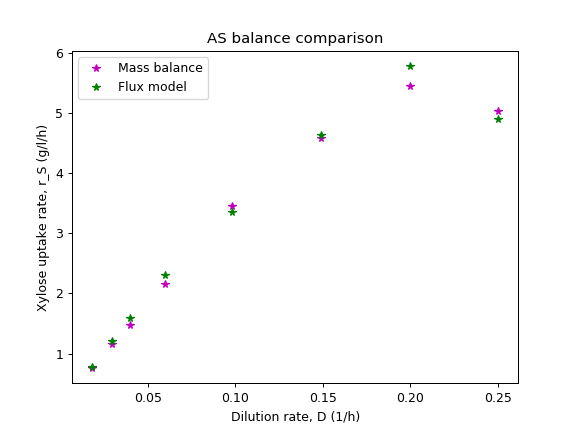

In [14]:
plt.figure('AS balance')
plt.title('AS balance comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('Xylose uptake rate, r_S (g/l/h)')
plt.plot(D_AS, -rSmb_AS*30*cX_AS, 'm*', label = 'Mass balance')
plt.plot(D_AS, r0_AS*30*cX_AS, 'g*', label = 'Flux model')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/AS balance', dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


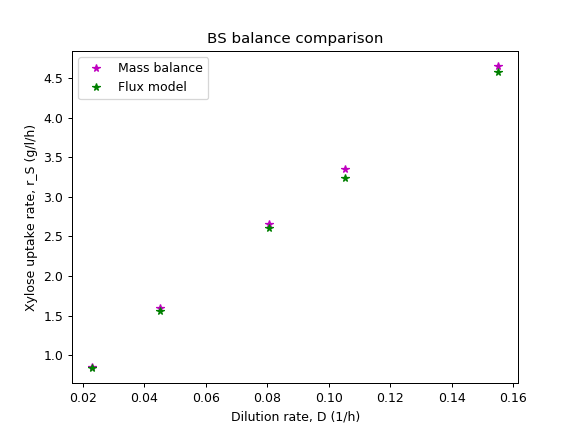

In [15]:
plt.figure('BS balance')
plt.title('BS balance comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('Xylose uptake rate, r_S (g/l/h)')
plt.plot(D_BS, -rSmb_BS*30*cX_BS, 'm*', label = 'Mass balance')
plt.plot(D_BS, r0_BS*30*cX_BS, 'g*', label = 'Flux model')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/BS balance', dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


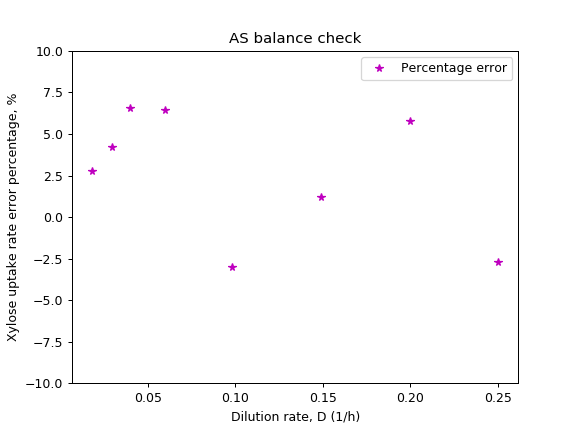

In [16]:
plt.figure('AS check')
plt.title('AS balance check')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('Xylose uptake rate error percentage, %')
plt.plot(D_AS, 100*(1 - (-rSmb_AS*30)/(r0_AS*30)), 'm*', label = 'Percentage error')
plt.legend(loc = 'best')
plt.ylim([-10, 10])
plt.savefig('Figures/Own/AS check', dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


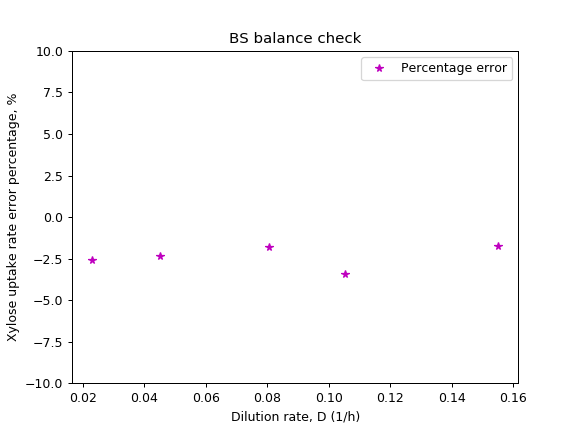

In [17]:
plt.figure('BS check')
plt.title('BS balance check')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('Xylose uptake rate error percentage, %')
plt.plot(D_BS, 100*(1 - (-rSmb_BS*30)/(r0_BS*30)), 'm*', label = 'Percentage error')
plt.legend(loc = 'best')
plt.ylim([-10, 10])
plt.savefig('Figures/Own/BS check', dpi = 300)
plt.show()

As seen, both have an accuracy of about $10$% or less, with BS matching much more closely.

# Yield, productivity and titre comparison

The yield, productivity and titre (YPT) from the flux model for the two organisms were compared and results are presented below.

## _Yield_

<IPython.core.display.Javascript object>


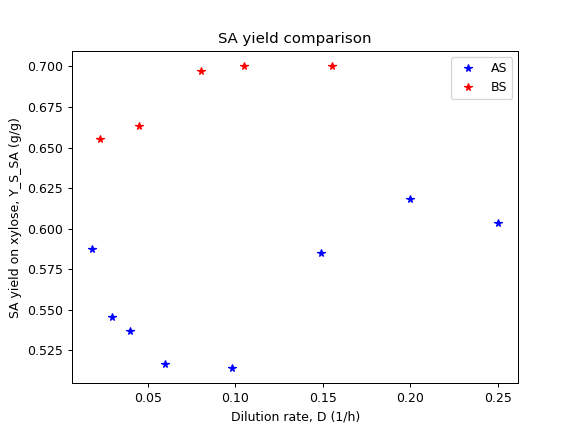

In [18]:
plt.figure('Y_SA')
plt.title('SA yield comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('SA yield on xylose, Y_S_SA (g/g)')
plt.plot(D_AS, -(rSAmb_AS*29.5)/(rSmb_AS*30), 'b*', label = 'AS')
plt.plot(D_BS, -(rSAmb_BS*29.5)/(rSmb_BS*30), 'r*', label = 'BS')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/Y_SA', dpi = 300)
plt.show()

BS has a clear advantage regarding yield on substrate, it should be kept in mind that BS also consumes more CO$_2$ than AS. CO$_2$, however, is still cheaper than most substrates.

## _Productivity_

<IPython.core.display.Javascript object>


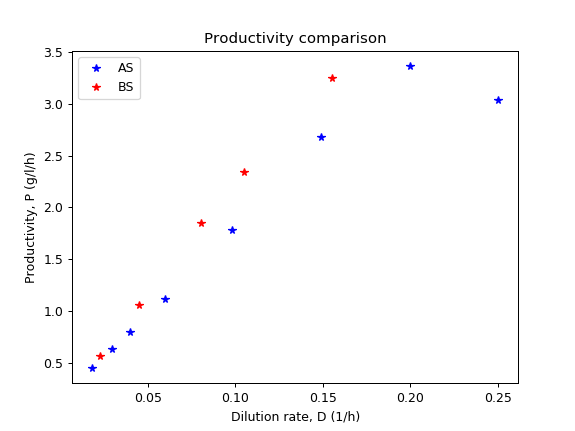

In [19]:
plt.figure('P')
plt.title('Productivity comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('Productivity, P (g/l/h)')
plt.plot(D_AS, (rSAmb_AS*29.5)*cX_AS, 'b*', label = 'AS')
plt.plot(D_BS, (rSAmb_BS*29.5)*cX_BS, 'r*', label = 'BS')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/P', dpi = 300)
plt.show()

BS has a slightly higher productivity than AS.

<IPython.core.display.Javascript object>


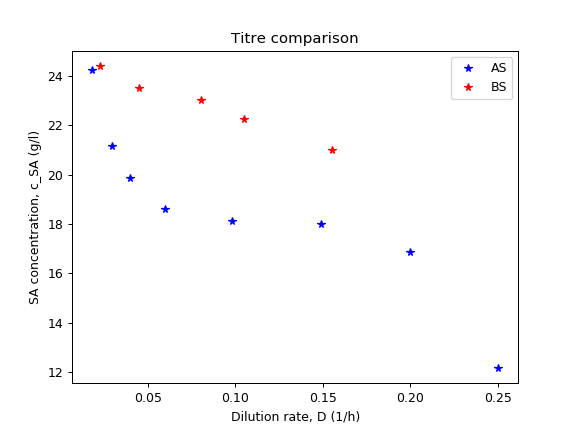

In [20]:
plt.figure('c_SA')
plt.title('Titre comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('SA concentration, c_SA (g/l)')
plt.plot(D_AS, (cSA_AS*29.5), 'b*', label = 'AS')
plt.plot(D_BS, (cSA_BS*29.5), 'r*', label = 'BS')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/c_SA', dpi = 300)
plt.show()

BS has a higher and more linear titre distribution than AS in the observed range.

# CO$_2$ analysis

The CO$_2$ consumption rate and consumption ratio over substrate was examined. The mass balance CO$_2$ rates were used.

<IPython.core.display.Javascript object>


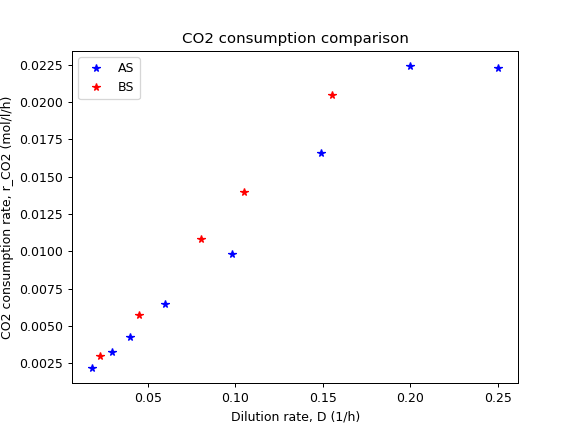

In [21]:
plt.figure('r_CO2')
plt.title('CO2 consumption comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('CO2 consumption rate, r_CO2 (mol/l/h)')
plt.plot(D_AS, -rCmb_AS*cX_AS, 'b*', label = 'AS')
plt.plot(D_BS, -rCmb_BS*cX_BS, 'r*', label = 'BS')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/r_CO2', dpi = 300)
plt.show()

The CO$_2$ consumption for both organisms are very similar, with BS consuming slightly more.

<IPython.core.display.Javascript object>


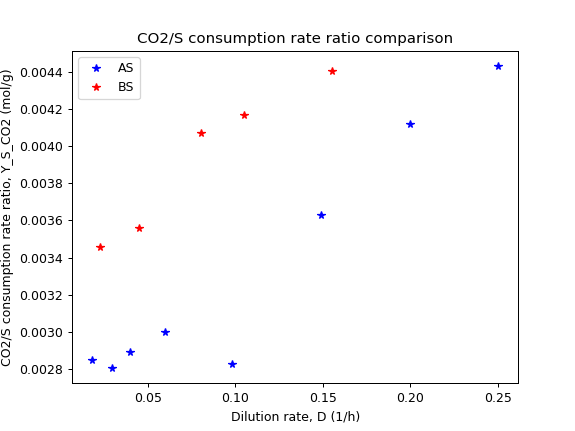

In [22]:
plt.figure('Y_CO2')
plt.title('CO2/S consumption rate ratio comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('CO2/S consumption rate ratio, Y_S_CO2 (mol/g)')
plt.plot(D_AS, rCmb_AS/(rSmb_AS*30), 'b*', label = 'AS')
plt.plot(D_BS, rCmb_BS/(rSmb_BS*30), 'r*', label = 'BS')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/Y_CO2', dpi = 300)
plt.show()

The CO$_2$ consumption ratio over substrate is considerably more for BS than AS. This could be the main reason for better YPT values for BS over AS.

# Redox analysis

Both organisms have numerous fluxes producing NADH, but the only sinks for both are for fumerate respiration to produce ATP (and minimally lactic acid production only in BS).

To maximize succinic acid production, the overall NADH production must be maximized. This means maximizing flow through all fluxes that produce NADH and minimizing flow through all other fluxes that consume NADH, except for fumerate respiration.

# Energy analysis

Both organisms utilize fumerate respiration, where they convert excess NADH generated to ATP.

To get the maximum rate of succinic acid production, this fumerate resiration flux must be maximized. All other fluxes producing ATP must be minimized and all fluxes consuming ATP must be maximized.

Higher growth and maintenance energy costs cause both organisms to produce succinic acid at a higher rate alongside higher substrate and CO$_2$ consumption rates.

This strategy is contrary to what the organisms "want". If energy costs are increased the organisms function in a more stressed manner. The result of this, however, is beneficial if we want to produce succinic acid economically on an industrial scale.

ATP production rates are compared below along with ATP yield on substrate.

<IPython.core.display.Javascript object>


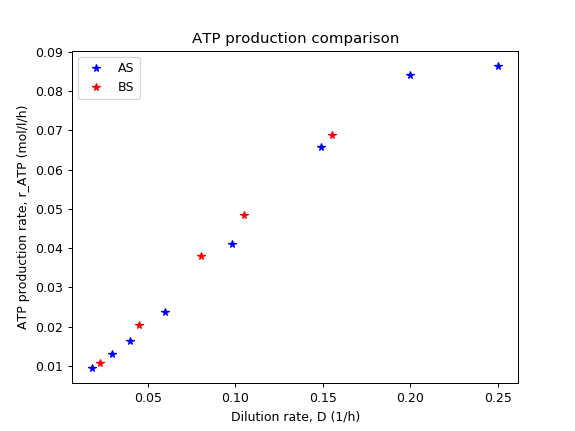

In [23]:
plt.figure('r_ATP')
plt.title('ATP production comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('ATP production rate, r_ATP (mol/l/h)')
plt.plot(D_AS, rATP_AS*cX_AS, 'b*', label = 'AS')
plt.plot(D_BS, rATP_BS*cX_BS, 'r*', label = 'BS')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/r_ATP', dpi = 300)
plt.show()

It is evident that ATP production rates for both organisms are very similar.

<IPython.core.display.Javascript object>


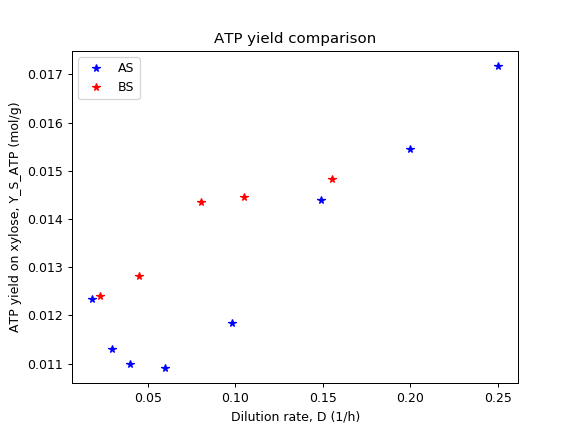

In [24]:
plt.figure('Y_ATP')
plt.title('ATP yield comparison')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('ATP yield on xylose, Y_S_ATP (mol/g)')
plt.plot(D_AS, -rATP_AS/(rSmb_AS*30), 'b*', label = 'AS')
plt.plot(D_BS, -rATP_BS/(rSmb_BS*30), 'r*', label = 'BS')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/Y_ATP', dpi = 300)
plt.show()

The ATP yield on substrate for BS is observed to be somewhat higher at lower dilution rates than for AS. This corresponds very well to the higher BS titres at the same dilution rates. This behaviour makes sense considering the explanation given above.

To further improve succinic acid production, the maintenance cost for the organism to survive could be artificially increased by modifying the reactor broth composition (pH etc.) or perhaps temperature.

# PPP analysis

The flux distribution through the futile cycling part of the PPP was investigated.

The fluxes going from and to X5P were plotted to illustrate the distribution for both organisms.

<IPython.core.display.Javascript object>


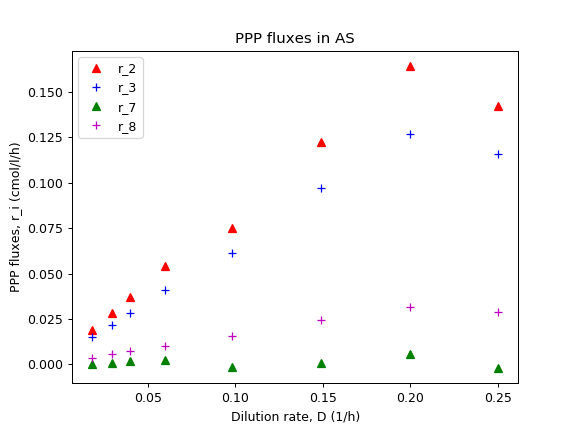

In [25]:
plt.figure('PPPAS')
plt.title('PPP fluxes in AS')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('PPP fluxes, r_i (cmol/l/h)')
plt.plot(D_AS, r2_AS*cX_AS, 'r^', label = 'r_2')
plt.plot(D_AS, r3_AS*cX_AS, 'b+', label = 'r_3')
plt.plot(D_AS, r7_AS*cX_AS, 'g^', label = 'r_7')
plt.plot(D_AS, r8_AS*cX_AS, 'm+', label = 'r_8')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/PPPAS', dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


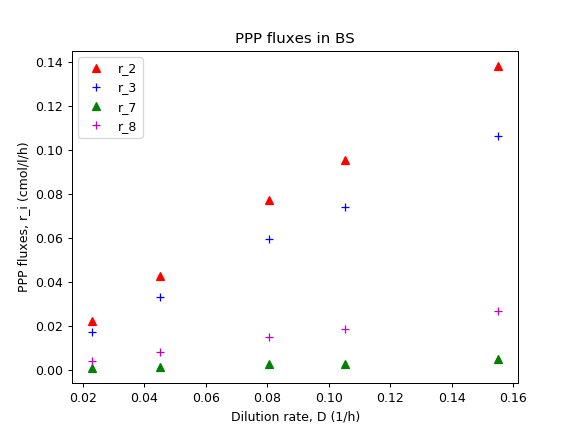

In [26]:
plt.figure('PPPBS')
plt.title('PPP fluxes in BS')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('PPP fluxes, r_i (cmol/l/h)')
plt.plot(D_BS, r2_BS*cX_BS, 'r^', label = 'r_2')
plt.plot(D_BS, r3_BS*cX_BS, 'b+', label = 'r_3')
plt.plot(D_BS, r7_BS*cX_BS, 'g^', label = 'r_7')
plt.plot(D_BS, r8_BS*cX_BS, 'm+', label = 'r_8')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/PPPBS', dpi = 300)
plt.show()

The PPP in both AS and BS was found to play a minimal roll. Futile cycling to produce NADH (r$_{7}$) or the flux bypassing F6P r$_{8}$ (which requires ATP to create) was barely utilized and the bulk of carbon was processed through normal glycolysis (r$_{3}$).

This provides production physiologists the opportunity to further increase succinic acid yields by increasing r$_{7}$ (to produce more NADH) and further decreasing r$_{8}$ (to consume more ATP via r$_{4}$).

# Reductive VS oxidative routes in BS

The difference in carbon distribution between the reductive and oxidative routes to produce succinic acid was investigated. The results are plotted below.

<IPython.core.display.Javascript object>


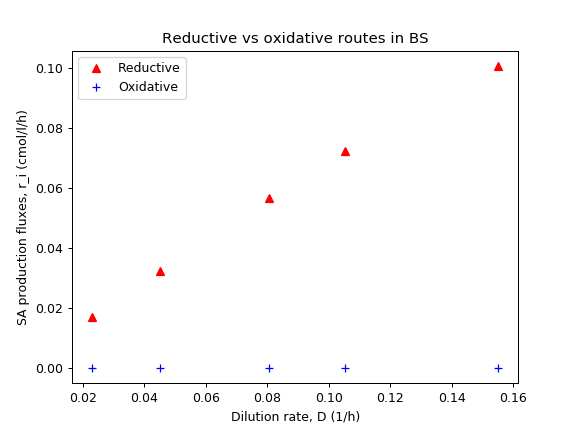

In [27]:
plt.figure('Red vs oxi')
plt.title('Reductive vs oxidative routes in BS')
plt.xlabel('Dilution rate, D (1/h)')
plt.ylabel('SA production fluxes, r_i (cmol/l/h)')
plt.plot(D_BS, r18_BS*cX_BS, 'r^', label = 'Reductive')
plt.plot(D_BS, r17_BS*cX_BS, 'b+', label = 'Oxidative')
plt.legend(loc = 'best')
plt.savefig('Figures/Own/Red vs oxi', dpi = 300)
plt.show()

As previously mentioned, the carbon flux through r$_{17}$ was slightly negative (due to CO$_2$ used as co-substrate and representative carbon source) but almost zero if not specified to zero.

Further research opportunities could include further quantifying the oxidative route or perhaps forcing it to be active and then measuring products or enzyme activities.

# Unknowns to investigate

Better analyses could possibly be done if the CO$_2$ consumption rate was measured. Better biomass quantification would also be helpful, as no biomass measurements were done but rather calculated. A number of zero growth runs could also provide valuable data and provide more understanding.

As the differences between AS and BS performances do exist, but are not exponential, further research could help enforce the choice of organism if one is to be chosen above another. A number of possible further research subjects include:
* Maximum temperature before denaturization starts (for faster reactions).
* Special feed requirements like added vitamins or chemicals.
* Maximum physiological growth rate quantification (for higher dilution rates).
* Physiological energy maintenance parameter quantification.
* Factors that could increase the organism maintenance cost.
* Quantification of possible reversible reactions and possible co-feeds to manipulate the metabolism.

Overall BS provides the best results and, due to its more complex metabolism, provides more room for future improvement in YPT values.